# Project 2 (Group Project) US Vaccination Insight



# Steps:

- Data Cleaning
- Date analysis
- Graphing
- Conclusion

# Data dictionary 

In [77]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data_dict={"Column name": "Definition",
"FIPS": "U.S. State identification code",
"Province_State": "Name of the State",
"Country_Region":"Code of the country",
"Date":"Data collection date",
"Lat":"Latitude",
"Long_":"Longitude",
"Vaccine_Type":"Common name of the vaccine provider. Can be either a combination of all vaccine types labeled as 'All', or a specific provider like Moderna or Pfizer",
"Doses_alloc":"Cumulative number of doses allocated",
"Doses_shipped": "Cumulative number of doses that have arrived to the vaccination sites.",
"Doses_admin" : "Cumulative number of doses administered, including booster doses for states where it is reported as part of the total.",
"Stage_One_Doses": "Cumulative number of first doses administered",
"Stage_Two_Doses": "Cumulative number of second doses administered",
"Combined_Key":"Combination of Province_State, Country_Region"}
data_dict_df= pd.DataFrame(data_dict, index=[0])
data_dict_df.T

,0
Column name,Definition
FIPS,U.S. State identification code
Province_State,Name of the State
Country_Region,Code of the country
Date,Data collection date
Lat,Latitude
Long_,Longitude
Vaccine_Type,Common name of the vaccine provider. Can be ei...
Doses_alloc,Cumulative number of doses allocated
Doses_shipped,Cumulative number of doses that have arrived t...


To analyze our data, we need to use some python libraries. In this section, we are importing all the required libraries such pandas, NumPy, matplotlib, and word cloud.

# Import dataset

In [78]:
# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
d = lambda x: datetime.strptime(x, '%Y-%m-%d')

# all States in U.S
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", 
          "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", 
          "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", 
          "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", 
          "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", 
          "Wisconsin", "Wyoming"]

# Load the data
## Main dataset: time_series_covid19_vaccine_doses_admin_US.csv & vaccine_data_us_timeline.csv
vus_doses = pd.read_csv('https://raw.githubusercontent.com/UC-Berkeley-I-School/Project2_Zhou_Tung_Iradukunda/main/time_series_covid19_vaccine_doses_admin_US.csv?token=GHSAT0AAAAAABQCEFTB55K7G5D3MUNO4THCYSYTSWA', index_col=False)
vus_type = pd.read_csv('https://raw.githubusercontent.com/UC-Berkeley-I-School/Project2_Zhou_Tung_Iradukunda/main/vaccine_data_us_timeline.csv?token=GHSAT0AAAAAABQCEFTAMLJKJGSBOHXPRSS4YSYTRUQ', index_col=False, parse_dates=['Date'], date_parser=d)

# Date Clean up

In [79]:
#change column names to all lower case
vus_doses = vus_doses.rename(columns = str.lower)
vus_type.columns= vus_type.columns.str.lower()

# remove unnecessary columns
vus_doses = vus_doses.drop(columns = ['uid', 'iso2', 'iso3', 'code3', 'admin2', 'lat', 'long_', 'combined_key'])
vus_type = vus_type.drop(columns = ['lat', 'long_', 'combined_key'])

# remove any rows with value in province_state that is not a U.S state
vus_doses = vus_doses[vus_doses['province_state'].isin(states)]
vus_type = vus_type[vus_type['province_state'].isin(states)]

# Convert dates in column into a column name 'date' for dataset vus_doses
vus_doses = vus_doses.melt(id_vars = ['fips', 'province_state', 'country_region', 'population'], 
              var_name = 'date', 
              value_name = 'total_doses').sort_values(by = ['province_state'])

# Only keep data in range 2021-03-31 - 2022-04-01
vus_doses = vus_doses[vus_doses. date> '2021-03-31']
vus_doses = vus_doses[vus_doses.date < '2022-04-01']

vus_type = vus_type[vus_type.date > '2021-03-31']
vus_type = vus_type[vus_type.date < '2022-04-01']

describe() function in pandas is used to get the statistics of each feature present in our dataset. Some of the information we get includes count, max, min, standard deviation, median, etc.

In [80]:
vus_doses.describe()

,fips,population,total_doses
count,"18,250.00","18,250.00","18,250.00"
mean,29.32,"6,550,675.48","7,882,960.17"
std,15.62,"7,315,216.25","9,837,842.31"
min,1.00,"578,759.00","262,406.00"
25%,17.00,"1,792,147.00","2,093,881.50"
50%,29.50,"4,558,233.50","4,763,112.00"
75%,42.00,"7,614,893.00","9,640,754.00"
max,56.00,"39,512,223.00","72,634,494.00"


In [81]:
vus_type.describe()

,fips,doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses
count,"109,500.00","6,538.00","106,963.00","107,413.00","58,025.00","71,859.00"
mean,29.32,"5,850,382.22","3,300,446.02","2,678,711.10","2,545,520.46","1,603,004.66"
std,15.62,"7,780,479.15","6,968,718.02","5,741,300.94","4,199,076.41","2,635,880.34"
min,1.00,0.00,"-186,039.00","-271,346.00",0.00,"-212,680.00"
25%,17.00,"508,630.00",0.00,"2,924.00","265,637.00","145,852.50"
50%,29.50,"2,476,885.00","655,500.00","461,825.00","1,035,830.00","718,076.00"
75%,42.00,"6,809,515.00","3,602,057.50","2,884,063.00","3,103,304.00","1,966,628.00"
max,56.00,"27,513,735.00","87,339,285.00","72,634,494.00","34,100,720.00","26,876,148.00"


# Covid19 Vaccine Manufacturer Insights

In [82]:
vus_type.vaccine_type.unique()

array(['Pfizer', 'Moderna', 'All', 'Unknown', 'Janssen', 'Unassigned',
       'unknown'], dtype=object)

Out of 6 vaccine type from our primary dataset, we decide to focus on the following vaccine type : Pfizen, Moderna and Jansseen for our analysis.


In [83]:
vus_type = vus_type[(vus_type['vaccine_type']=='Moderna') | (vus_type['vaccine_type']=='Pfizer') |(vus_type['vaccine_type']=='Janssen')]

In [84]:
vus_type.vaccine_type.unique()

array(['Pfizer', 'Moderna', 'Janssen'], dtype=object)

Which vaccine manufacturer's product is most frequently reported in being administered and adopted?

In [85]:
vus_type['province_state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

Out of 50 states, We picked Top 5 most populated states which are: California , Texas, Florida, New York ,Pennsylvania.

In [86]:
vus_type = vus_type[(vus_type['province_state']=='California') | (vus_type['province_state']=='Florida') 
                    |(vus_type['province_state']=='New York') | (vus_type['province_state']=='Texas') 
                    |(vus_type['province_state']=='Pennsylvania')]

In [87]:
vus_type['province_state'].unique()

array(['California', 'Florida', 'New York', 'Pennsylvania', 'Texas'],
      dtype=object)

In [88]:
vus_type_subset= vus_type[(vus_type.date == "2022-03-31")]
state_population = vus_doses.groupby(['province_state']).agg({'population': 'first'})
total_vac_popu_by_vac_type = state_population.merge(vus_type_subset, how='inner', on='province_state')
total_vac_popu_by_Moderna= total_vac_popu_by_vac_type[total_vac_popu_by_vac_type.vaccine_type=='Moderna']
total_vac_popu_by_Pfizer= total_vac_popu_by_vac_type[total_vac_popu_by_vac_type.vaccine_type=='Pfizer']
total_vac_popu_by_Janssen= total_vac_popu_by_vac_type[total_vac_popu_by_vac_type.vaccine_type=='Janssen']
total_vac_popu_by_vac_type['perc_Moderna'] = (total_vac_popu_by_Moderna.stage_two_doses) / (total_vac_popu_by_Moderna.population) *100
total_vac_popu_by_vac_type['perc_Pfizer'] = (total_vac_popu_by_Pfizer.stage_two_doses) / (total_vac_popu_by_Pfizer.population) *100
total_vac_popu_by_vac_type['perc_Janssen'] = (total_vac_popu_by_Janssen.stage_one_doses) / (total_vac_popu_by_Janssen.population) *100
total_popu_vac_type_v1v2=total_vac_popu_by_vac_type[['date','province_state','vaccine_type','population','perc_Moderna', 'perc_Pfizer', 'perc_Janssen']]
total_popu_vac_type_v1v2_new=total_popu_vac_type_v1v2.groupby(by="province_state").agg({'population': 'first','perc_Moderna':'sum','perc_Pfizer':'sum','perc_Janssen':'sum'}).sort_values(['perc_Moderna','perc_Pfizer','perc_Janssen'],ascending=False)
total_popu_vac_type_v1v2_new.reset_index(inplace=True)

In [89]:
total_popu_vac_type_v1v2_new

,province_state,population,perc_Moderna,perc_Pfizer,perc_Janssen
0,New York,"19,453,561.00",25.48,44.23,6.42
1,California,"39,512,223.00",24.36,41.44,5.27
2,Pennsylvania,"12,801,989.00",24.16,37.78,5.63
3,Florida,"21,477,737.00",22.55,37.39,6.31
4,Texas,"28,995,881.00",20.92,35.19,4.66


In [90]:
total_popu_vac_type_v1v2_new1=total_popu_vac_type_v1v2[['vaccine_type','perc_Moderna','perc_Pfizer','perc_Janssen']]

total_popu_vac_type_v1v2_new2=total_popu_vac_type_v1v2_new1.groupby(by="vaccine_type").sum()
total_popu_vac_type_v1v2_new2.reset_index(inplace=True)

In [91]:
total_popu_vac_type_v1v2_new2['perc_vaccine_type'] = total_popu_vac_type_v1v2_new2.sum(axis=1)

/var/folders/tc/8sjp0kt163j490kfmrg356s00000gn/T/ipykernel_1183/1876639145.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_popu_vac_type_v1v2_new2['perc_vaccine_type'] = total_popu_vac_type_v1v2_new2.sum(axis=1)


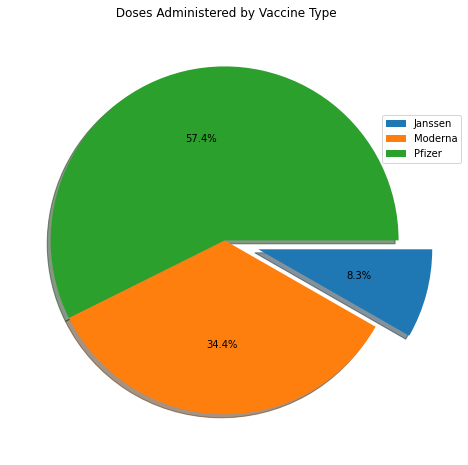

In [92]:
fig, ax = plt.subplots(figsize=(16, 8))
#colors = ['c', 'm', 'y']
labels = ['Janssen','Moderna','Pfizer']
explode = (0.2, 0,0)
plt.pie(total_popu_vac_type_v1v2_new2.perc_vaccine_type,autopct='%.1f%%',explode=explode,counterclock=False, shadow=True)
plt.title(' Doses Administered by Vaccine Type')
plt.legend(labels, bbox_to_anchor=(0.85,0.80), loc="upper left")
plt.show()

To answer our research question : the most frequently vaccine manufacturer reported in being administered and adopted.
We used administered doses and population size of the Top 5 states to find the percentage of admistered doses for each vaccine manufacturer on March 31st 2022.
Pfizer and Moderna had two doses while Jansseen only had one dose which means to be considered fully vaccinated for Pfizer and Moderna two doses are needed while only one dose for Janssen is considered fully vaccined.
We found that Pfizer was the most dominant overalll with 57.4%.  

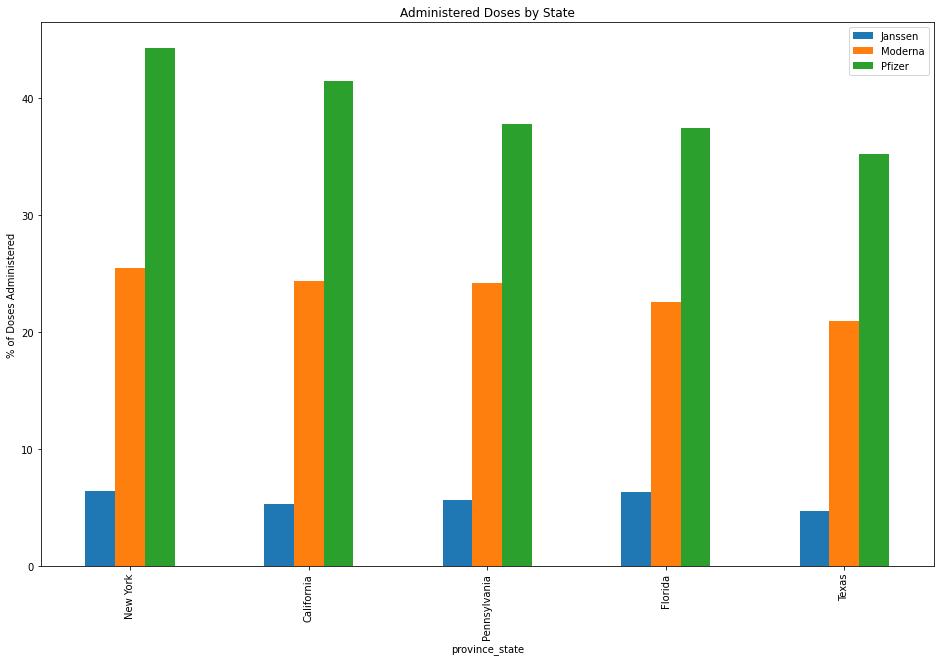

In [93]:
labels = ['Janssen','Moderna','Pfizer']
total_popu_vac_type_v1v2_new.plot(x="province_state", y=["perc_Janssen","perc_Moderna","perc_Pfizer"], kind="bar",figsize=(16,10),title='Administered Doses by State')
plt.ylabel("% of Doses Administered")
plt.legend(labels)

What are the percentages of doses administered by manufacturer for each state?

Among the top 5 populated states, As shown in the bar chart, by March 31, 2022, the state that has the highest percentage of population vaccinated is New York and Pfizer being the most dominant manufacturer with 44.2% . Texas is with lowest percentage of population vaccinated and  Janssen being the least dominant with 4.7%.
We also want to take a look at the vaccination progress for each vaccine type over time in terms of the average of vaccinated population against each manufacturer in April 2021 to March 2022.

In [95]:
total_vac_popu_by_vac_type_over_time = state_population.merge(vus_type, how='right', on='province_state')
total_vac_popu_by_Moderna_over_time= total_vac_popu_by_vac_type_over_time[total_vac_popu_by_vac_type_over_time.vaccine_type=='Moderna']
total_vac_popu_by_Pfizer_over_time= total_vac_popu_by_vac_type_over_time[total_vac_popu_by_vac_type_over_time.vaccine_type=='Pfizer']
total_vac_popu_by_Janssen_over_time= total_vac_popu_by_vac_type_over_time[total_vac_popu_by_vac_type_over_time.vaccine_type=='Janssen']
total_vac_popu_by_vac_type_over_time['perc_Moderna'] = (total_vac_popu_by_Moderna_over_time.stage_two_doses) / (total_vac_popu_by_Moderna_over_time.population) *100
total_vac_popu_by_vac_type_over_time['perc_Pfizer'] = (total_vac_popu_by_Pfizer_over_time.stage_two_doses) / (total_vac_popu_by_Pfizer_over_time.population) *100
total_vac_popu_by_vac_type_over_time['perc_Janssen'] = (total_vac_popu_by_Janssen_over_time.stage_one_doses) / (total_vac_popu_by_Janssen_over_time.population) *100
total_vac_popu_by_vac_type_over_time =total_vac_popu_by_vac_type_over_time [['date','province_state','vaccine_type','population','perc_Moderna', 'perc_Pfizer', 'perc_Janssen']]
total_vac_popu_by_vac_type_over_time_new=total_vac_popu_by_vac_type_over_time .groupby(by="date").sum()
total_vac_popu_by_vac_type_over_time_new.reset_index(inplace=True)

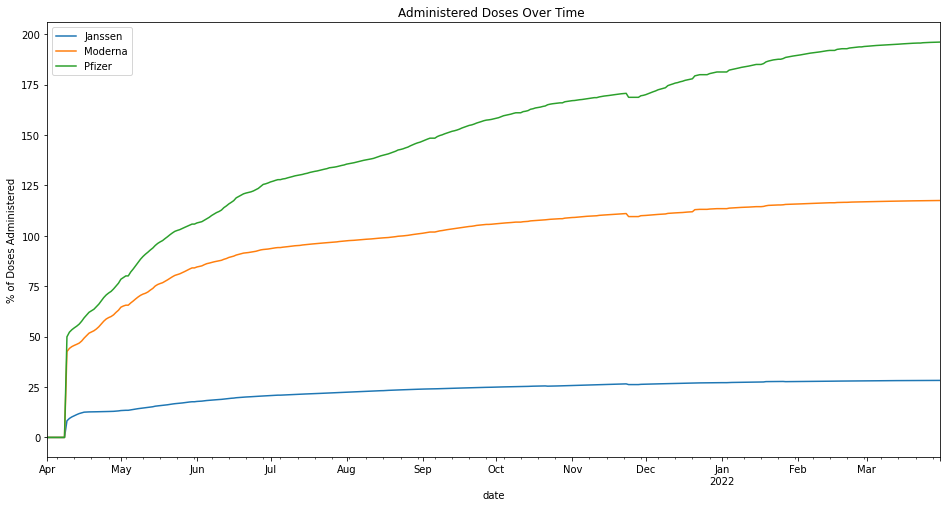

In [96]:
total_vac_popu_by_vac_type_over_time_new.plot(x="date", y=["perc_Janssen","perc_Moderna","perc_Pfizer"], kind="line",figsize=(16,8),
                                             title="Administered Doses Over Time ")
plt.ylabel("% of Doses Administered")
plt.legend(labels)


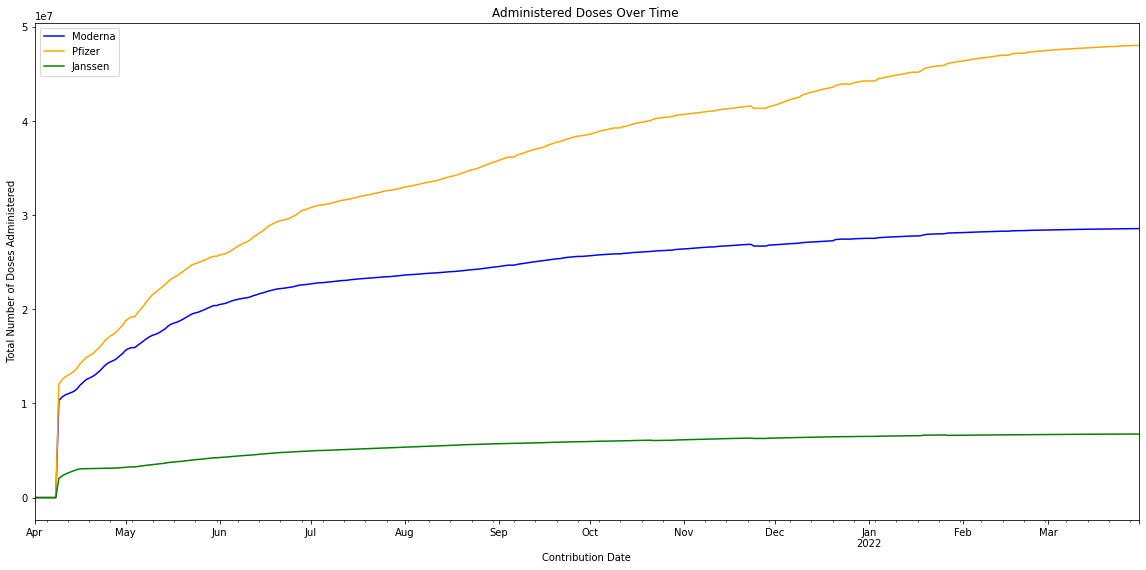

In [97]:
fig, ax  = plt.subplots(1,1, figsize=(16, 8))
fig.align_labels()
vus_type_new1 = vus_type[vus_type.vaccine_type == 'Moderna'].groupby(['date']).agg({'stage_two_doses' : 'sum'}).reset_index()
vus_type_new2 = vus_type[vus_type.vaccine_type == 'Pfizer'].groupby(['date']).agg({'stage_two_doses' : 'sum'}).reset_index()
vus_type_new3 = vus_type[vus_type.vaccine_type == 'Janssen'].groupby(['date']).agg({'stage_one_doses' : 'sum'}).reset_index()
vus_type_new1.plot.line(ax=ax, x='date', y='stage_two_doses', color = 'blue', label = 'Moderna')
vus_type_new2.plot.line(ax=ax, x='date', y='stage_two_doses', color = 'orange', label = 'Pfizer')
vus_type_new3.plot.line(ax=ax, x='date', y='stage_one_doses', color = 'green', label = 'Janssen')
ax.set_title("Administered Doses Over Time ")
ax.set_xlabel("Contribution Date")
ax.set_ylabel(" Total Number of Doses Administered")
plt.tight_layout(pad=1)
plt.show()

Over time, how was vaccine manufacturer being administered and adopted by the population?

While Jansseen has been the least administered and adopted manufacturer, At the beginning of April 2021, Pfizer and Moderna doses were similary being administered and adopted.
Mid April, Pfizer slowly started moving up and took over.